In [39]:
import pandas as pd
import seaborn as sns

In [21]:
# Load the New York reviews data
NY_reviews = pd.read_csv('/content/New_York_reviews.csv', sep=',')
NY_reviews.head()

<ipython-input-21-20fd0351bf9a>:1: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  NY_reviews = pd.read_csv('/content/New_York_reviews.csv', sep=',')


,Unnamed: 0,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,1,2,Lido,5,Positive,review_773559838,A Regular Treat,My wife and I have been eating dinner frequent...,My wife and I have been eating dinner frequent...,"October 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,2,3,Lido,4,Positive,review_769429529,Good neighborhood spot!,Came with family for Labor Day weekend brunch ...,Came with family for Labor Day weekend brunch ...,"September 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,3,4,Lido,1,Negative,review_745700258,Disappointing,Food was mediocre at best. The lamb chops are...,Food was mediocre at best. The lamb chops are ...,"February 17, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,4,5,Lido,5,Positive,review_728859349,What a find in Harlem,My co-workers were volunteering at a foodbank ...,My co-workers were volunteering at a foodbank ...,"November 25, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,5,6,Lido,5,Positive,review_728429643,Lunch,Lido is an intimate boutique style restaurant....,Lido is an intimate boutique style restaurant....,"November 23, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


**Features**

- parse_count: numerical (integer), corresponding number of extracted review by the web scraper (auto-incremental)
- author_id: categorical (string), univocal, incremental and anonymous identifier of the user (UID_XXXXXXXXXX)
- restaurant_name: categorical (string), name of the restaurant matching the review
- rating_review: numerical (integer), review score in the range 1-5
- sample: categorical (string), indicating “positive” sample for scores [4-5] and “negative” for scores [1-3]
- review_id: categorical (string), univocal and internal identifier of the review (review_XXXXXXXXX)
- title_review: text, review title
- review_preview: text, preview of the review, truncated in the website when the text is very long
- review_full: text, complete review
- date: timestamp, publication date of the review in the format (day, month, year)
- city: categorical (string), city of the restaurant which the review was written for
- url_restaurant: text, restaurant url

In [22]:
# Drop unnecessary for the analysis columns
NY_reviews = NY_reviews.drop(['parse_count', 'Unnamed: 0'], axis =1)
NY_reviews.head()

,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,Lido,5,Positive,review_773559838,A Regular Treat,My wife and I have been eating dinner frequent...,My wife and I have been eating dinner frequent...,"October 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,Lido,4,Positive,review_769429529,Good neighborhood spot!,Came with family for Labor Day weekend brunch ...,Came with family for Labor Day weekend brunch ...,"September 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,Lido,1,Negative,review_745700258,Disappointing,Food was mediocre at best. The lamb chops are...,Food was mediocre at best. The lamb chops are ...,"February 17, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,Lido,5,Positive,review_728859349,What a find in Harlem,My co-workers were volunteering at a foodbank ...,My co-workers were volunteering at a foodbank ...,"November 25, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,Lido,5,Positive,review_728429643,Lunch,Lido is an intimate boutique style restaurant....,Lido is an intimate boutique style restaurant....,"November 23, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


In [32]:
# Reorder the columns for convenience
NY_reviews = NY_reviews[['review_id', 'restaurant_name', 'rating_review', 'sample', 'title_review', 'review_preview', 'review_full', 'date', 'city', 'url_restaurant', 'author_id']]
NY_reviews.head()

,review_id,restaurant_name,rating_review,sample,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,review_773559838,Lido,5,Positive,A Regular Treat,My wife and I have been eating dinner frequent...,My wife and I have been eating dinner frequent...,"October 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,review_769429529,Lido,4,Positive,Good neighborhood spot!,Came with family for Labor Day weekend brunch ...,Came with family for Labor Day weekend brunch ...,"September 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,review_745700258,Lido,1,Negative,Disappointing,Food was mediocre at best. The lamb chops are...,Food was mediocre at best. The lamb chops are ...,"February 17, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,review_728859349,Lido,5,Positive,What a find in Harlem,My co-workers were volunteering at a foodbank ...,My co-workers were volunteering at a foodbank ...,"November 25, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,review_728429643,Lido,5,Positive,Lunch,Lido is an intimate boutique style restaurant....,Lido is an intimate boutique style restaurant....,"November 23, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


In [24]:
# Check if there are any duplicated rows
NY_reviews['review_id'].duplicated().sum()

0

In [25]:
# Check if there are any null values
NY_reviews.isna().sum()

review_id          0
restaurant_name    0
rating_review      0
sample             0
title_review       1
review_preview     1
review_full        2
date               2
city               2
url_restaurant     2
author_id          2
dtype: int64

In [26]:
# Check the shape of the DataFrame
NY_reviews.shape

(510463, 11)

In [27]:
# Drop null values and make sure they are dropped by printing the shape data again
NY_reviews = NY_reviews.dropna(axis = 0)
NY_reviews.shape

(510461, 11)

In [28]:
# Double check if there are still null values
NY_reviews.isna().sum()

review_id          0
restaurant_name    0
rating_review      0
sample             0
title_review       0
review_preview     0
review_full        0
date               0
city               0
url_restaurant     0
author_id          0
dtype: int64

In [29]:
# Check the data types
NY_reviews.dtypes

review_id          object
restaurant_name    object
rating_review      object
sample             object
title_review       object
review_preview     object
review_full        object
date               object
city               object
url_restaurant     object
author_id          object
dtype: object

In [16]:
# Find unique valyes in rating_review column
NY_reviews['rating_review'].unique()

array([5, 4, 1, 3, 2, '4', '5', '2', '1', '3'], dtype=object)

In [35]:
# Correct the data types in 'rating_review' and 'date' column
NY_reviews['rating_review'] = NY_reviews['rating_review'].astype(int)
NY_reviews['date'] = pd.to_datetime(NY_reviews['date'])
NY_reviews.dtypes

review_id                  object
restaurant_name            object
rating_review               int64
sample                     object
title_review               object
review_preview             object
review_full                object
date               datetime64[ns]
city                       object
url_restaurant             object
author_id                  object
dtype: object

In [36]:
# Check if the DataFrame looks like expected after the transformation
NY_reviews.head()

,review_id,restaurant_name,rating_review,sample,title_review,review_preview,review_full,date,city,url_restaurant,author_id
0,review_773559838,Lido,5,Positive,A Regular Treat,My wife and I have been eating dinner frequent...,My wife and I have been eating dinner frequent...,2020-10-08,New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
1,review_769429529,Lido,4,Positive,Good neighborhood spot!,Came with family for Labor Day weekend brunch ...,Came with family for Labor Day weekend brunch ...,2020-09-08,New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
2,review_745700258,Lido,1,Negative,Disappointing,Food was mediocre at best. The lamb chops are...,Food was mediocre at best. The lamb chops are ...,2020-02-17,New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
3,review_728859349,Lido,5,Positive,What a find in Harlem,My co-workers were volunteering at a foodbank ...,My co-workers were volunteering at a foodbank ...,2019-11-25,New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
4,review_728429643,Lido,5,Positive,Lunch,Lido is an intimate boutique style restaurant....,Lido is an intimate boutique style restaurant....,2019-11-23,New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_4


In [38]:
# Get a summary information of the numeric data
NY_reviews.describe()

,rating_review
count,510461.000000
mean,4.226999
std,1.002140
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='rating_review', ylabel='count'>

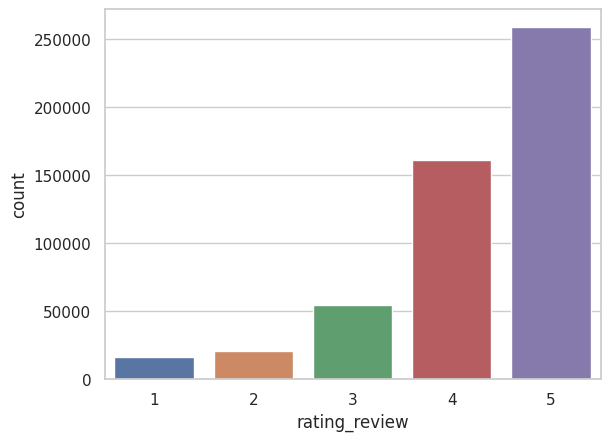

In [40]:
# Create a visualization to see how many reviews of each rating are in the DataFrame
sns.set_theme(style="whitegrid")
sns.countplot(x=NY_reviews['rating_review'])